# Nasty Factorial! Assessing the complexity of an ordering problem
## Try me
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ffraile/operations-research-notebooks/blob/main/docs/source/MIP/tutorials/Nasty_factorial.ipynb)[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ffraile/operations-research-notebooks/main?labpath=docs%2Fsource%2FMIP%2Ftutorials%2FNasty_factorial.ipynb)

## Problem definition
Ordering is not as simple as it seems. Ordering an array of length N implies finding the right sequence of elements out of N! possible sequences. The exclamation mark is the factorial operator, and this makes the size of the problem increase really fast with N.
To illustrate how fast, just try this script, it will represent the number of possible orderings of a set of N elements for N from 1 to 10:

In [3]:
import numpy as np
from scipy.special import factorial
from matplotlib import pyplot as plt
from datetime import datetime
import ipywidgets as widgets
from ipywidgets import interactive
#We set the mode inline of matplotlib to get the result at the output of the cell code
%matplotlib inline

# Plot the number of possible orderings of a set of N elements (set_size = N)
def plot_factorial(set_size):
  x = np.arange(1, set_size + 1)
  y = factorial(x)
  plt.plot(x,y)
  plt.xlabel("N")
  plt.ylabel("N!")
  plt.title("Number of possible orderings of a set of N elements")
  plt.show()

interactive_plot = interactive(plot_factorial, set_size=(1, 10, 1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(IntSlider(value=5, description='set_size', max=10, min=1), Output(layout=Layout(height='…

## Complexity
### Assessing the complexity of the problem
Informally, *complexity* relates to how complex it is to solve a problem. Conceptually, this can be estimated by the number of operations that the computer has to do find a solution. We can assume that in a computer, the time used to do an operation is more or less constant, so we are going to estimate the complexity by measuring the time used to solve the problem. To do this, we are going to use the ```datetime``` library of Python. This library allows us to take a reference of the time at the beginning of the execution of a piece of code and another reference at the end of the execution. The difference between the two references is the time used to execute the code.

Let us see this in action using the library Numpy. First, using the function np.random.shuffle() we are going to generate a random ordering of an array of numbers. Then, we will use the function np.sort() to order the array, and using the ```datetime```function as described above, we are going to measure the time used to sort the array with np.sort():

In [4]:
N = 10
# let´s generate an array of 10 numbers
x = np.arange(0,N)
# let´s change the order of the numbers randomly
np.random.shuffle(x)
#print(x)
#now, let´s take a reference of the time before sorting
init_time = datetime.now()
# let´s sort, note that the right ordering sequence is 1 out of n!
y = np.sort(x)
#let´s take another reference of the time after sorting and measure the
#difference in seconds:
end_time = datetime.now()
duration =  end_time - init_time
print(f"all righty, i ordered the array in {duration.microseconds} microseconds")
# print(y)

all righty, i ordered the array in 0 microseconds


Note that, in the result saved in the notebook, it only took a fraction of a second to order an array of 10 numbers! Ok, but what happens if we increase the size of the problem? Let´s use the same function to generate arrays of different sizes and measure how the time used to order them increases with the size of the problem:

Text(0, 0.5, 'Computing time (microseconds)')

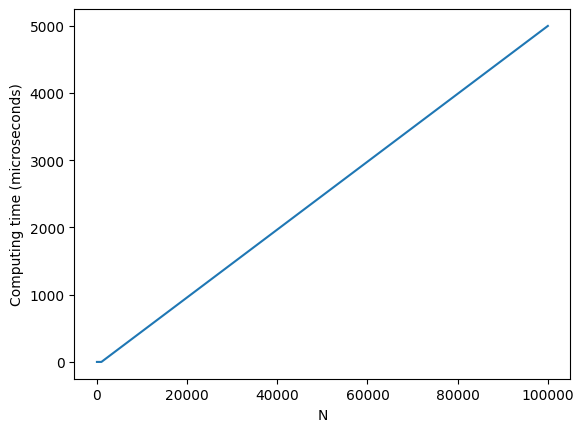

In [8]:
# Let´s generate an array of different sizes
n = [10, 100, 1000, 100000]
#Init the computing time
computing_time = np.zeros(len(n))

# Do the steps in the scripts above for every size in the array n
for i in range(len(n)):
  arr_length=n[i]
  x_arr = np.arange(0,arr_length)
  np.random.shuffle(x_arr)
  init_time = datetime.now()
  np.sort(x_arr)
  end_time = datetime.now()
  duration = end_time - init_time
  computing_time[i] = duration.microseconds

#Plot the results
plt.plot(n, computing_time)
plt.xlabel("N")
plt.ylabel("Computing time (microseconds)")

This simple script shows that the time needed by the sorting algorithm used by Numpy can be approximated to a **linear function** of the size of the set N. This is a very efficient algorithm!

It is not only efficient, also mezmerizing, in the following video you can see it in action:

[![Sorting algorithms](http://img.youtube.com/vi/kPRA0W1kECg/0.jpg)](http://www.youtube.com/watch?v=kPRA0W1kECg "Sorting algorithms")

We can agree that this problem is not complex, because we have an algorithm that solves it easily. But what would happen if we did not have this algorithm at hand? Imagine that we have to try for instance all the possible orderings of an array of numbers to find the right one. This is called **brute force**. How many operations would we have to do? Let´s try to estimate it.

## Assessing the complexity without an algorithm
Let us assume, that we could generate an ordering and check it, really fast, in one microsecond.

How many orderings would we have to check? Well, we have N! possible orderings, so we would have to do N! operations. We can use the following script to estimate the computing time needed to solve the problem using brute force, and compare it with the computing time needed by the sorting algorithm of Numpy:


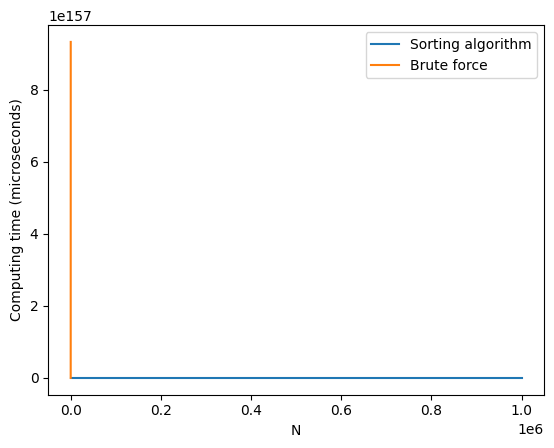

In [6]:
# Let´s calculate the factorial of N
N_factorial = factorial(n)

# Since it is in microseconds, we can compare it with the computing time in microseconds obtained before:

plt.plot(n, computing_time, label="Sorting algorithm")
plt.plot(n, N_factorial, label="Brute force")
plt.xlabel("N")
plt.ylabel("Computing time (microseconds)")
plt.legend()


Wow, what happened here? The time needed to solve the problem using brute force is so big that it is not even visible in the plot! This is because the factorial function grows so fast that it is not possible to represent it in a number in Python. By comparison, the time needed by the sorting algorithm is negligible. We could try to plot in a log scale to see the difference:


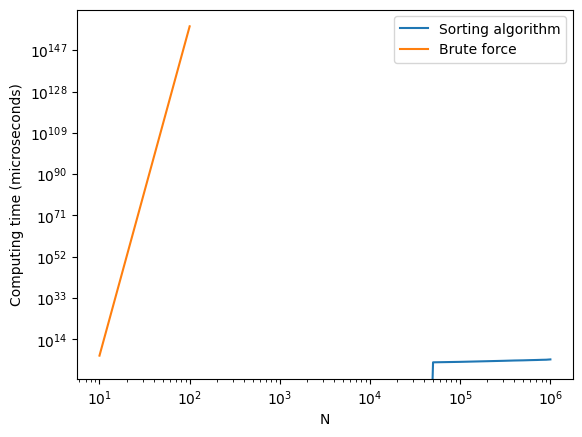

In [7]:
plt.plot(n, computing_time, label="Sorting algorithm")
plt.plot(n, N_factorial, label="Brute force")
plt.xlabel("N")
plt.ylabel("Computing time (microseconds)")
plt.legend()
plt.yscale("log")
plt.xscale("log")


Wow, it is still impossible to visualize both functions in the same plot! Now in log scale, the brute force solution is a straight line, and the sorting algorithm is moreor less constant. This means that the time needed by the brute force algorithm grows **exponentially** with the size of the problem. Since the time needed by the sorting algorithm increases **linearly** with the size of the array to sort, we can conclude that the algorithm is very efficient. In fact, every algorithm that has a complexity that grows slower than any polynomial is considered efficient, and it is called a **polynomial algorithm**. In this case, the sorting algorithm is a **linear algorithm**, and sorting an array of is a **polynomial** (or class P) problem.


## Analysis questions
Try to answer the following **analysis questionss**. You can use AI assistant to help you, but try to answer them by yourself first and analyze critically the answers given by the AI assistant.

1. How many microseconds have you lived? Try to find an estimate of the number of microseconds you have lived, and express it as a factorial number. Based on the results of the previous section, what is the largest array you could sort using brute force in your whole life (assuming that you can check an ordering in one microsecond)?



2. Repeat the previous exercise, but now think of the number of microseconds that have passed since the big bang. What is the largest array you could sort using brute force since the big bang (also assuming that you can check an ordering in one microsecond?


3. The experiments above might not be accurate, because we provided too few values of N. Modify this line of code ```n = [10, 100, 1000, 100000]``` to include more values of N, and repeat the analysis. What do you observe?


4. Note that the time needed by the sorting algorithm might not be exactly constant. Why would you modify the script to deal with this issue?

